---
# **データサイエンス基礎　第14回課題**
## **【モンテカルロ法】円周率を数値解析的に求める**
---
### 1. 各数値解析の結果を評価するための関数を用意

#### (1) 誤差を計算する関数
　算出された円周率の値と，真の円周率の絶対誤差および相対誤差を計算するプログラムを用意する．

#### (2) 計算時間を計測する関数
　数値解析によって円周率を算出するまでの時間を計測するプログラムを用意する．

#### (3) グラフに描画する関数
　ある条件式に基づいて，円周率の出力とグラフの描画を行うプログラムを用意する．

In [9]:
# ライブラリの読み込み
# %pip install --upgrade pip
# %pip install numpy
# %pip install matplotlib
# %pip install pandas
# %pip install openpyxl
# %pip install sympy
# %pip install scipy
# %pip install re
# %pip install jaconv
# %pip install scikit-learn
# %pip install statsmodels
# %pip install seaborn
# %pip install pmdarima
# %pip install kneed
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module='seaborn')
warnings.filterwarnings("ignore", category=DeprecationWarning)
from matplotlib.font_manager import FontProperties
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import sympy as sp
import scipy.stats as stats
import re
import jaconv 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import itertools
import matplotlib.dates as mdates
import pmdarima as pm
from IPython.display import clear_output
from sklearn.metrics import r2_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from kneed import KneeLocator
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import time
from matplotlib.ticker import LogLocator, LogFormatter


# 誤差を計算する関数
def calculate_errors(pi) :
    TRUE_PI = math.pi
    absolute_error = abs(pi - TRUE_PI)
    relative_error = absolute_error / TRUE_PI * 100
    print(f'PI value : {pi:.15f}, Error : {absolute_error:.15f} ({relative_error:.8f} %)')
    return absolute_error, relative_error


# 計算時間を計測する関数
def measure_time(start_time) :
    if start_time == None :
        start_time = time.time()
        return start_time
    else :
        calculate_time = time.time() - start_time
        print(f'Calculating time : {calculate_time:.3f} s')
        return calculate_time


# グラフを描画する関数
def plot_circle(iterations, judgement) :
    start_time = time.time()
    ax = None
    if judgement :
        fig = plt.figure()
        plt.rcParams['font.family'] = 'Times New Roman'
        ax = fig.add_subplot(1, 1, 1)
        ax.axis("scaled")
        c1 = plt.Circle((0, 0), radius=1, fc="None", ec="r", linewidth=2, color="black", zorder=2)
        ax.add_patch(c1)
        ax.set_xlim(-1.2, 1.2)
        ax.set_ylim(-1.2, 1.2)
        plt.title(f'Iteration : {iterations} ')
    plot_time = time.time() - start_time
    return plot_time, ax

### 2. モンテカルロ法
　モンテカルロ法とは，$-1<x<1$，$-1<y<1$ の範囲にランダムに点をプロットし，原点からの距離が1以下である範囲内にプロットされた割合から，円と正方形の面積を比較し，円周率を求めるものである．プロットが多くなるほど，真の円周率に近づくものと考えられる．  
　以下に，モンテカルロ法で実際に円周率を求めた結果を示す．

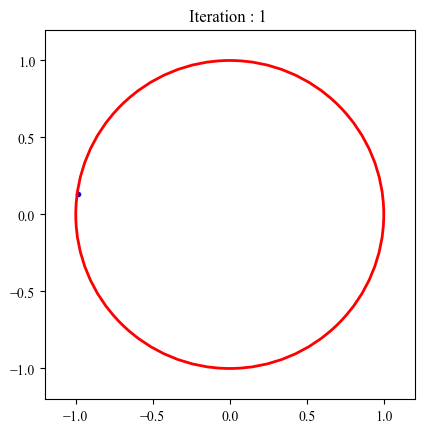

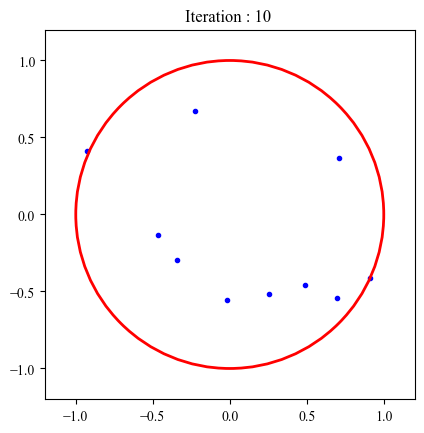

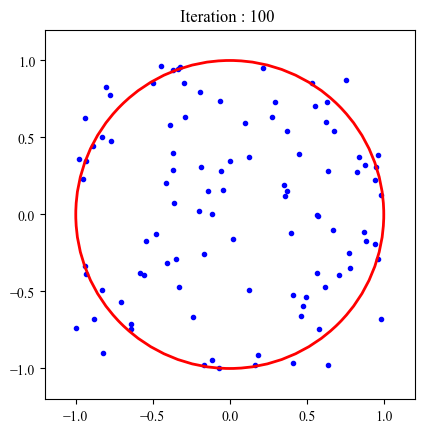

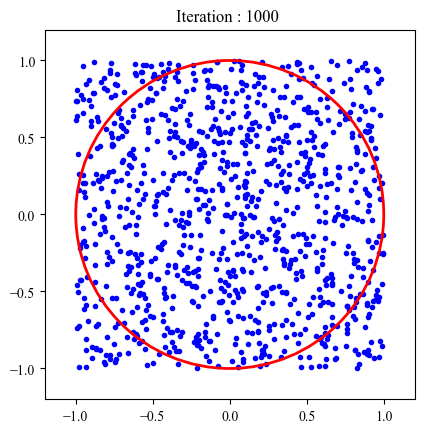

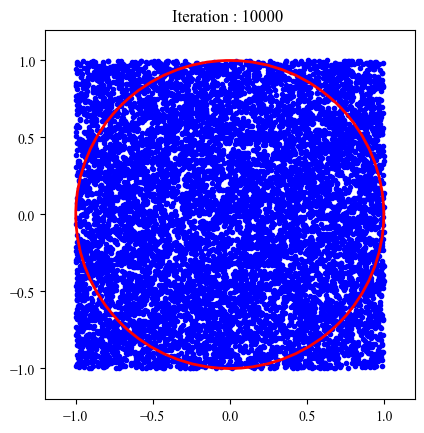

Calculating time : 119.652 s
PI value : 3.146000000000000, Error : 0.004407346410207 (0.14029019 %)
Monte Carlo Method : Total iteration is 10000.


In [10]:
# モンテカルロ法
def monte_carlo(iterations, ax) :
    counter = 0
    for iteration in range(iterations) :
        x, y = random.uniform(-1, 1), random.uniform(-1, 1)
        if ax != None :
            ax.scatter(x, y, marker=".", color="blue", zorder=1)
        if x**2 + y**2 <= 1 :
            counter += 1
    pi = counter / iterations * 4
    plt.show()
    return pi

# 10000回で確認
num = 10000
start_time = measure_time(None)
for iteration in range(1, num+1) :
    judgement = math.log10(iteration).is_integer()
    plot_time, ax = plot_circle(iteration, judgement)
    start_time += plot_time
    pi = monte_carlo(iteration, ax)
calculate_time = measure_time(start_time)
absolute_error, relative_error = calculate_errors(pi)
print(f'Monte Carlo Method : Total iteration is {num}.')

　このように，モンテカルロ法はランダムな手法を用いているため，ばらつきがあり，また毎回算出される値が異なる．その点を点数を増やすことによって賄っているが，計算時間をかなり要した．点数にして10000点あるいは計算時間にして90秒もかかったが，小数第1位までしか正しく算出できなかった．

### 2. 格子点を利用した方法
　$-1<x<1$，$-1<y<1$ の範囲にプロットさせる格子点を利用して，原点からの距離が1以下である範囲内にプロットされた割合から，円と正方形の面積を比較し，円周率を求めるものである．プロットが多くなるほど，真の円周率に近づくものと考えられる．  
　以下に，格子点を利用した方法によって実際に円周率を求めた結果を示す．

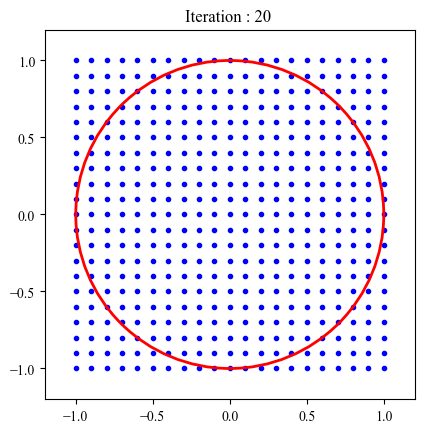

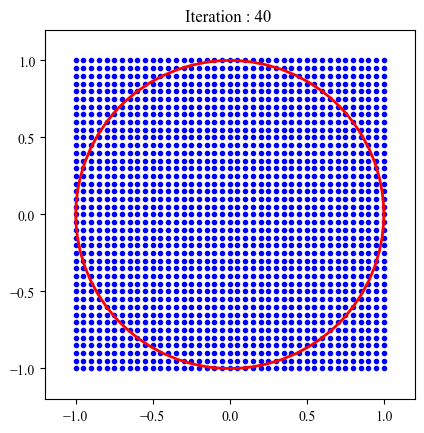

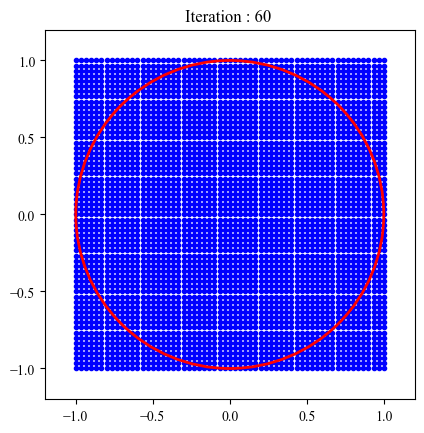

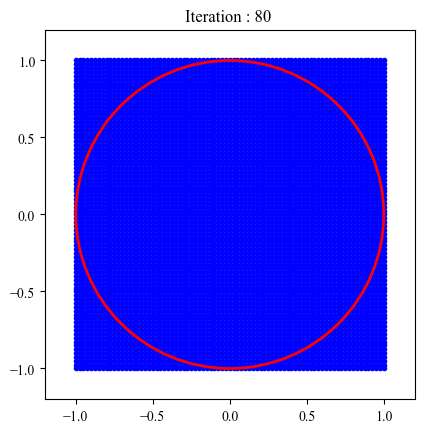

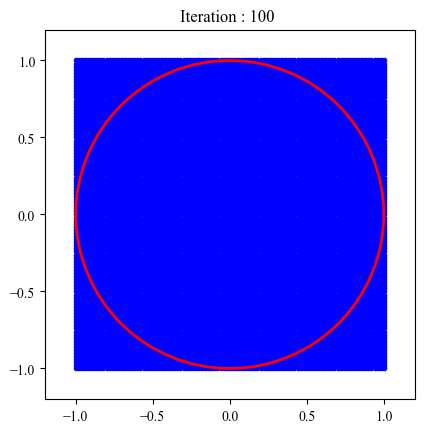

Calculating time : 152.971 s
PI value : 3.136400000000000, Error : 0.005192653589793 (0.16528730 %)
Grid Points Method : Total iteration is 100.


In [11]:
# 格子点を利用した方法
def grid_points(grid, ax) :
    counter = 0
    for x in np.linspace(-1, 1, grid + 1) :
        for y in np.linspace(-1, 1, grid + 1) :
            if ax != None :
                ax.scatter(x, y, marker=".", color="blue", zorder=1)
            if x**2 + y**2 <= 1 :
                counter += 1
    pi = counter / (grid)**2 * 4
    plt.show()
    return pi

# 100回で確認
num = 100
start_time = measure_time(None)
for iteration in range(1, num+1) :
    judgement = iteration % 20 == 0 and iteration <= 100
    plot_time, ax = plot_circle(iteration, judgement)
    start_time += plot_time
    pi = grid_points(iteration, ax)
calculate_time = measure_time(start_time)
absolute_error, relative_error = calculate_errors(pi)
print(f'Grid Points Method : Total iteration is {num}.')

　精度はモンテカルロ法よりも向上しているように見えるが，安直にそのように評価してはいけない．両手法とも円の内部にプロットされた点の割合を算出していると説明したが，格子点を用いた方法では，全体の点数を $格子数^2（分割数^2）$ としている．厳密には，点の総数は $(格子数+1)^2$ であるから，こちらで計算した場合，10000点では，モンテカルロ法よりも精度劣る場合が多い．今回は，補正値として $格子数^2（分割数^2）$ の方を用いている．この補正値の意味は，円をピクセル（格子）で表現してその面積を求めるが，ピクセル内の格子の数ではなく格子点の数をカウントすることによって，円の境界が角ばってしまう分を補正していると考えることができる．

### 3. アルキメデスの方法
　アルキメデスの方法とは，円に内接する正$n$角形と，外接する正$n$角形の周の長さをそれぞれ算出することによって，円周はその範囲に含まれるため，円周率の範囲が絞り込めるというアルゴリズムである．今回は，単位円に内外接する正$n$角形の周の長さの平均値を円周の長さとして算出する．正$n$角形の頂点 $ n $ の数が増えれば，真の円周率に近づくものと考えられる．ここで，単位円に内外接する正$n$角形の1辺の長さは，次式により求まる．  
$$ \text{内接する正n角形の辺の長さ} = 2 \sin \left(\frac{\pi}{n}\right) $$  
$$ \text{外接する正n角形の辺の長さ} = 2 \tan \left(\frac{\pi}{n}\right) $$  
　アルキメデスの方法は，元々コンピュータによる数値解析によって算出するものではないため，今回は必要な値を算出するために三角関数や正確な $\pi$ の値を用いることとなるが，実際は計算しやすい角度となる多角形を，紐などを用いて作り，その長さを計測したものと考えられる．  
　今回は正確な値を用いた結果として，アルキメデスの方法による近似値が過剰に高精度となる可能性も考えられるが，上式の三角関数の値は，有名角時の三角関数の値を加法定理や倍角・半角の公式を用いて表現可能であるため，その影響を考える必要はないといえる．  
　以下に，アルキメデスの方法によって算出した円周率とその他の手法による比較を行う．


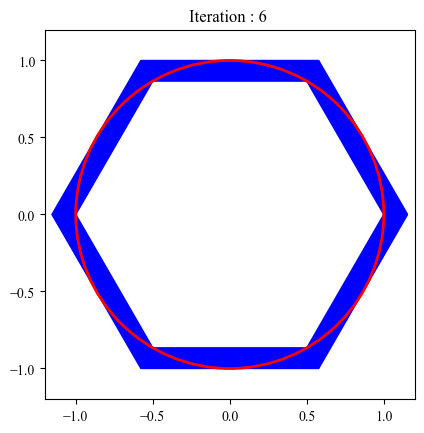

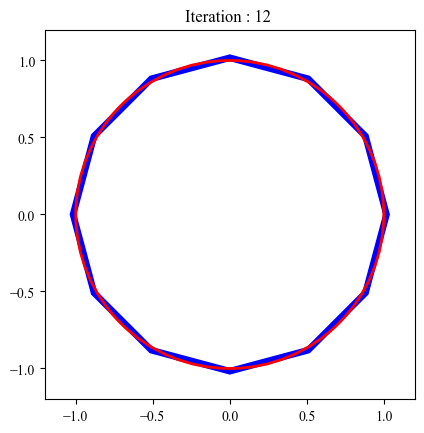

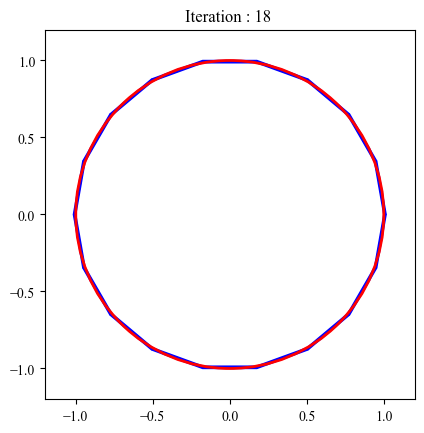

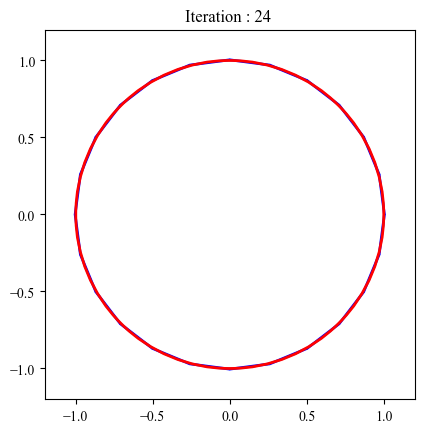

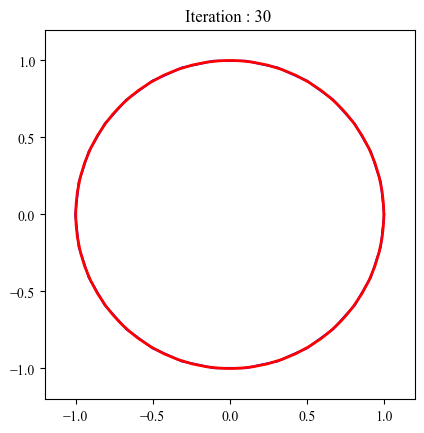

Calculating time : 2.915 s
PI value : 3.141592679428359, Error : 0.000000025838566 (0.00000082 %)
Archimedes Method : Total iteration is 10000.


In [12]:
# アルキメデスの方法
def archimedes(n, ax) :
    polygon_angles = np.linspace(0, 2 * np.pi, n+1)
    x_in, y_in = np.cos(polygon_angles), np.sin(polygon_angles)
    x_out, y_out = np.cos(polygon_angles) / math.cos(math.pi / n), np.sin(polygon_angles) / math.cos(math.pi / n)
    if ax != None :
        for i in range(n):
            # 内接する多角形の頂点
            x1, y1 = x_in[i], y_in[i]
            x2, y2 = x_in[(i + 1) % n], y_in[(i + 1) % n]
            
            # 外接する多角形の頂点
            x3, y3 = x_out[(i + 1) % n], y_out[(i + 1) % n]
            x4, y4 = x_out[i], y_out[i]
            
            # 四角形を形成して塗りつぶす
            plt.fill([x1, x2, x3, x4], [y1, y2, y3, y4], color='blue')
    pi_in = n * math.sin(math.pi / n)
    pi_out = n * math.tan(math.pi / n)
    pi = 0.5 * (pi_in + pi_out)
    plt.show()
    return pi

# 10000回で確認
num = 10000
start_time = measure_time(None)
for iteration in range(1, num+1) :
    judgement = iteration % 6 == 0 and iteration <= 30
    plot_time, ax = plot_circle(iteration, judgement)
    start_time += plot_time
    pi = archimedes(iteration, ax)
calculate_time = measure_time(start_time)
absolute_error, relative_error = calculate_errors(pi)
print(f'Archimedes Method : Total iteration is {num}.')

　このように，アルキメデスの方法を用いることによって，誤差が限りなく小さく，数値解析的にも計算時間が短いという結果が得られた．精度に関する評価はこれで概ね問題ないが，計算時間に関しては注意が必要である．前述の通り，真の $\pi$ がわかっていない場合，諸値を計算するために式変形をする時間がかかると考えると，その分計算時間は増大するものと考えられる．精度に関しては， $\sqrt{2}$ や $\sqrt{3}$ の値をどれだけ正確に計算できるかによって若干，劣化することが考えられる．
### 4. 各手法の精度と計算時間の比較

　Iteration数を100とし，各手法による精度と計算時間を比較する．ただし，各手法で計算数（アルゴリズム数）やプロット数をなるべく等しくするために，モンテカルロ法とアルキメデスの方法の入力値は $Iteration^2$ とした．

In [28]:
# 各手法における 100 iteration での精度の推移と計算時間の推移 
num = 100
data = []
for iteration in range(1, num+1) :
    clear_output(wait=True)
    print(f'>> Iteration : {iteration} / {num}')

    # モンテカルロ法
    print(f'・Monte Carlo Method')
    start_time = measure_time(None)
    pi = monte_carlo(iteration**2, ax)
    calculate_time = measure_time(start_time)
    absolute_error, relative_error = calculate_errors(pi)
    data.append([iteration, 'Monte Carlo', 'PI Value', pi])
    data.append([iteration, 'Monte Carlo', 'Absolute Error', absolute_error])
    data.append([iteration, 'Monte Carlo', 'Relative Error', relative_error])
    data.append([iteration, 'Monte Carlo', 'Calculate Time', calculate_time])

    # 格子点を利用した方法
    print(f'・Grid Points Method')
    start_time = measure_time(None)
    pi = grid_points(iteration, ax)
    calculate_time = measure_time(start_time)
    absolute_error, relative_error = calculate_errors(pi)
    data.append([iteration, 'Grid Points', 'PI Value', pi])
    data.append([iteration, 'Grid Points', 'Absolute Error', absolute_error])
    data.append([iteration, 'Grid Points', 'Relative Error', relative_error])
    data.append([iteration, 'Grid Points', 'Calculate Time', calculate_time])

    # アルキメデスの方法
    print(f'・Archimedes Method')
    start_time = measure_time(None)
    pi = archimedes(iteration**2, ax)
    calculate_time = measure_time(start_time)
    absolute_error, relative_error = calculate_errors(pi)
    data.append([iteration, 'Archimedes', 'PI Value', pi])
    data.append([iteration, 'Archimedes', 'Absolute Error', absolute_error])
    data.append([iteration, 'Archimedes', 'Relative Error', relative_error])
    data.append([iteration, 'Archimedes', 'Calculate Time', calculate_time])

df = pd.DataFrame(data, columns=['Iterations', 'Method', 'Value Name', 'Value'])
df.to_csv('data_dict.csv', index=False)

>> Iteration : 100 / 100
・Monte Carlo Method
Calculating time : 0.010 s
PI value : 3.116400000000000, Error : 0.025192653589793 (0.80190707 %)
・Grid Points Method
Calculating time : 0.005 s
PI value : 3.136400000000000, Error : 0.005192653589793 (0.16528730 %)
・Archimedes Method
Calculating time : 0.000 s
PI value : 3.141592679428359, Error : 0.000000025838566 (0.00000082 %)


このように，計算精度に関しては，  
$$アルキメデスの方法 > 格子点を利用した方法 > モンテカルロ法$$  
という結果が得られ，計算時間に関しても，  
$$アルキメデスの方法 > 格子点を利用した方法 > モンテカルロ法$$  
という結果となった．  
　したがって，アルキメデスの方法が最良であることが分かる．

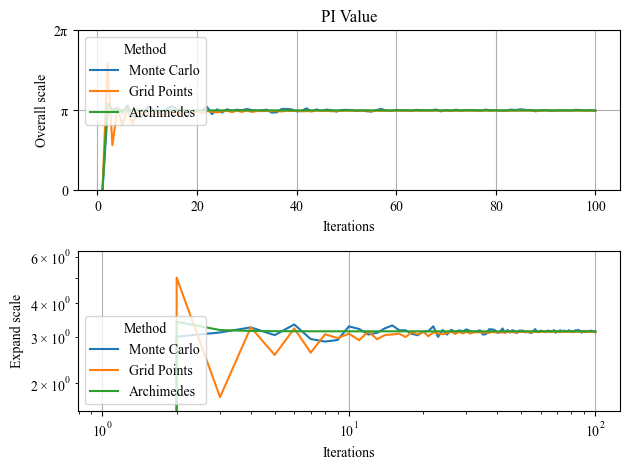

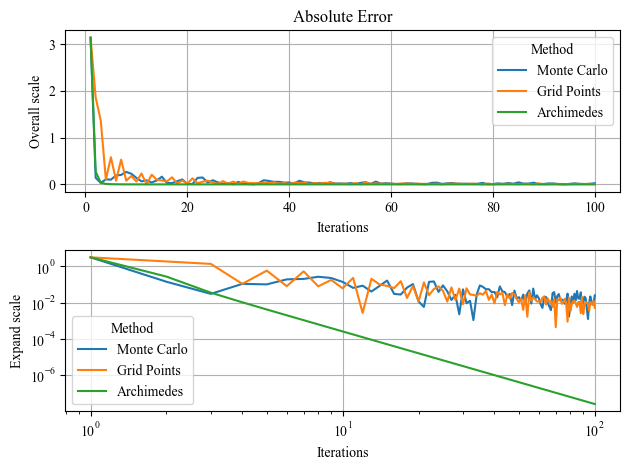

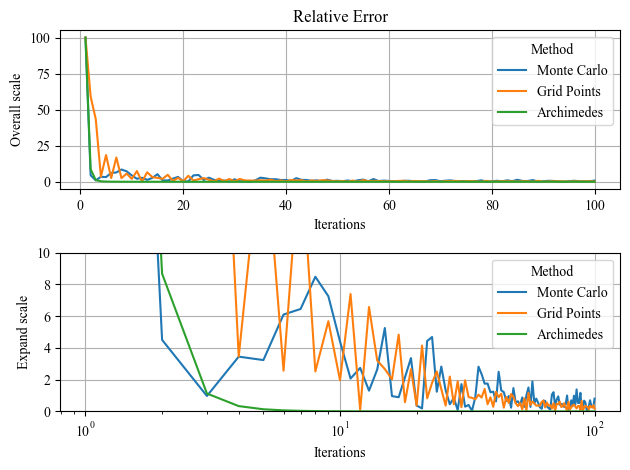

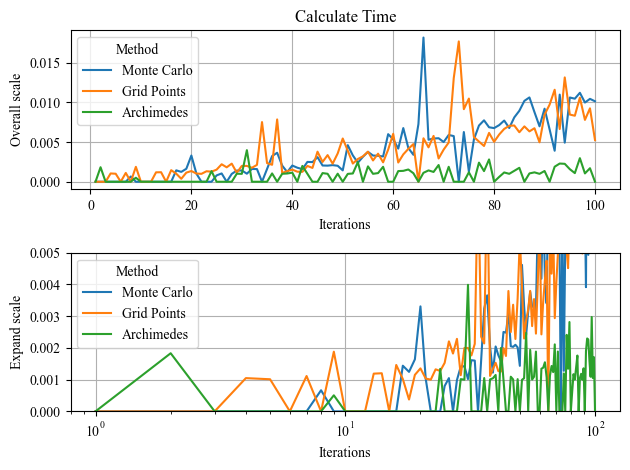

In [29]:
TRUE_PI = math.pi
for i, value_name in enumerate(df['Value Name'].unique()):
    subset = df[df['Value Name'] == value_name]
    fig, (ax1, ax2) = plt.subplots(2, 1)
    if value_name == 'PI Value':
        sns.lineplot(data=subset, x='Iterations', y='Value', hue='Method', ax=ax1)
        ax1.set_ylim(0, 2 * TRUE_PI)
        ax1.set_yticks(np.arange(0, 3 * TRUE_PI, TRUE_PI), ['0', 'π', '2π'])
        sns.lineplot(data=subset, x='Iterations', y='Value', hue='Method', ax=ax2)
        ax2.set_xscale('log')
        ax2.set_yscale('log')
        ax2.set_ylim(TRUE_PI / 2, TRUE_PI * 2)
        ax2.set_yticklabels([])
    elif value_name == 'Absolute Error':
        sns.lineplot(data=subset, x='Iterations', y='Value', hue='Method', ax=ax1)
        sns.lineplot(data=subset, x='Iterations', y='Value', hue='Method', ax=ax2)
        ax2.set_xscale('log')
        ax2.set_yscale('log')
    elif value_name == 'Relative Error':
        sns.lineplot(data=subset, x='Iterations', y='Value', hue='Method', ax=ax1)
        sns.lineplot(data=subset, x='Iterations', y='Value', hue='Method', ax=ax2)
        ax2.set_xscale('log')
        ax2.set_ylim(0, 10)
    elif value_name == 'Calculate Time':
        sns.lineplot(data=subset, x='Iterations', y='Value', hue='Method', ax=ax1)
        sns.lineplot(data=subset, x='Iterations', y='Value', hue='Method', ax=ax2)
        ax2.set_xscale('log')
        ax2.set_ylim(0, 5e-3)
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Overall scale')
    ax2.set_ylabel('Expand scale')
    ax1.grid(True)
    ax2.grid(True)
    ax1.set_title(value_name)
    plt.tight_layout()
    plt.show()

　アルキメデスの方法は，低いIterationでもかなり円周率に近い値であることが確認できる．また，絶対誤差に関しては，両対数軸のグラフが直線であることから，Iterationごとに絶対誤差が負の累乗に比例して減少する事がわかる．計算時間に関しても，計算時間のトレンドおよびピーク共に小さく，優れた手法であることが確認できる．

### 感想  
　探索手法は，解の精度および計算時間に直結するので，適切な手法に関する知見を深めたいと思った．機械学習における探索にも活用できると良いと感じた．
　